# Visualizations - Seaborn
Seaborn is a commonly used library for visualizations (http://seaborn.pydata.org/index.html). It makes it fast and easy to create pretty charts. What is more, it has a great documentation full of interesting and inspiring examples. Examples in this notebook are taken from this gallery (http://seaborn.pydata.org/examples/index.html).

%matplotlib command tells the notebook to show charts as output.

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## Histograms
You can get the simplest histograms using distplot. First, draw numbers from the normal distribution, then modify default size of the image. Seaborn is albo based on matplotlib, which is a basic Python library to draw.

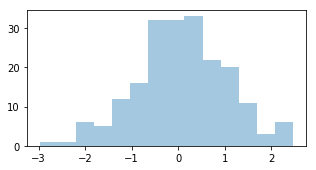

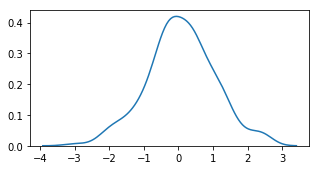

In [2]:
rs = np.random.RandomState(10)
d = rs.normal(size=200)


matplotlib.rcParams['figure.figsize'] = (5.0, 2.5)

sns.distplot(d, kde=False)
plt.show()

sns.distplot(d, hist=False)
plt.show()

# sns.distplot(d)
plt.show()

In [3]:
d

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
        0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
       -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
       -0.52929608,  1.04618286, -1.41855603, -0.36249918, -0.12

Default colors are quite readable and nice to look at. You have a few default styles available to use. If you do not like dark-grey color scheme, you may use bright one. Additionally, in the last chart you may fill the area under the distribution curve. despine gets rid of chart borders, which is added by default to "white" style.

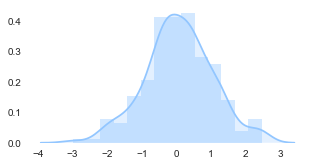

In [4]:
sns.set(style="white", palette="pastel", color_codes=True)
plt.figure(figsize=(5.0, 2.5))
sns.distplot(d, hist=True, color="b", kde_kws={"shade": True})
sns.despine(left=True, bottom=True)
plt.show()

## Charts of two variables
Seaborn offers great possibilities to draw charts of two variables. Apart from the usual scatterplot (or extended with histograms) you may easily generate hexheatmap or  KDF chart.

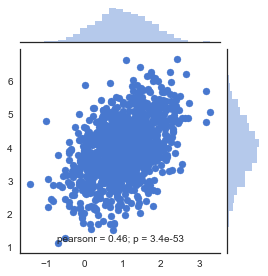

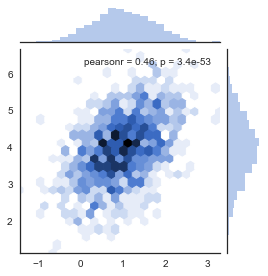

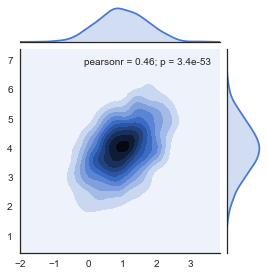

In [5]:
data = np.random.multivariate_normal([1,4],[[.5,.3], [.3,.8]],1000).T
sns.set(style="white", palette="muted", color_codes=True)
sns.jointplot(x=data[0], y=data[1], size=4)

sns.jointplot(x=data[0], y=data[1], kind="hex", size=4)
sns.jointplot(x=data[0], y=data[1], kind="kde", size=4)
plt.show()

## Many series on one chart
The example below shows perfecly how to add more series to one chart.

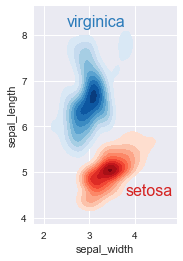

In [6]:
# Generate data
iris = sns.load_dataset("iris")
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

sns.set(style="darkgrid")
# "Break up" the chart object to two variables, ax is related to our data series.
f, ax = plt.subplots(figsize=(6, 4))
# Make sure that both series have the same scaling
ax.set_aspect("equal")

# Add further series. Do not shade the lowest level.
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add text in chosen places.
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)
plt.show()

## Violin charts and boxplot
Violin charts are quite popular recently. See two Seaborn examples. They are essentially classic boxplots extended by estimated KDF. The first example shows how to draw multiple distributions in an attractive way. Note that every violin chart is symmetric. It seems to be wasted potential. The second example uses split option, which allows to draw each half differently for two subgroups.

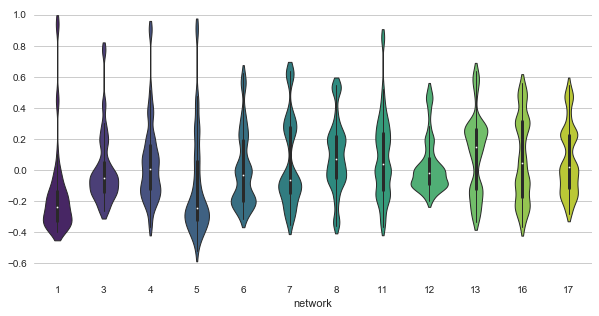

In [7]:
sns.set(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="viridis", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

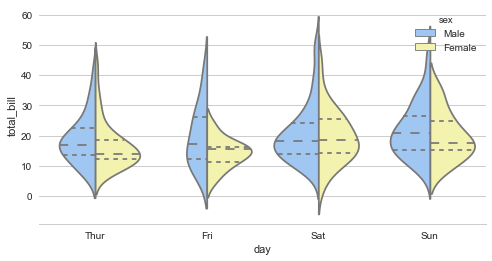

In [8]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")
plt.figure(figsize=(8.0, 4))
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

Of course, the classic boxplot is also available.

/home/wilam/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2052: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/home/wilam/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2053: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/home/wilam/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/wilam/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


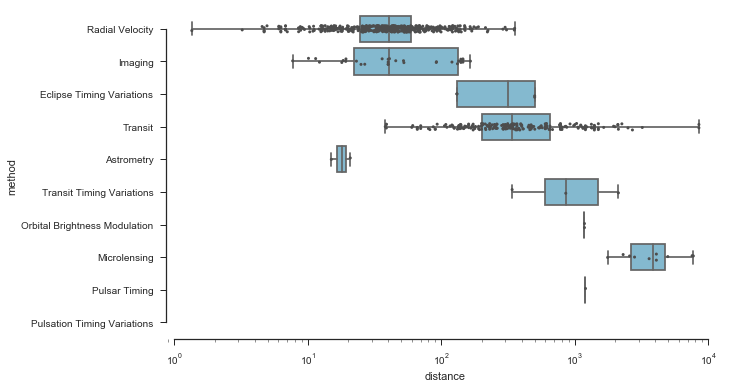

In [17]:
sns.set(style="ticks", palette="muted", color_codes=True)

# Load the example planets dataset
planets = sns.load_dataset("planets")

plt.figure(figsize=(10.0, 6))
# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="distance", y="method", data=planets,
                 whis=np.inf, color="c")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(trim=True)

## Additional settings
Seaborn is perfect to create charts quickly and it is usually fine not to change a lot of settings. However, if you feel like it, you may adjust the chart for your particular needs.
* http://seaborn.pydata.org/tutorial/aesthetics.html
* http://seaborn.pydata.org/tutorial/color_palettes.html